In [1]:
%matplotlib inline
import numpy as np
from scipy import special,io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from drumMF import loadTest_mat
import os
from itertools import product

In [2]:
fs=1e4
drumRadius=120
MaxAngularZero=30
MaxRadialZero=30
responseFreq=850

In [3]:
fileDirectory='/Users/edwardlrichards/Documents/data/tone_150608'
xyFile='xy_data.mat'
experiment=loadTest_mat.LocationForcing(fileDirectory, fs)
# z=np.squeeze(np.array(experiment.response))
# experiment.calculateResponseAtF(responseFreq, 1)

In [4]:
xPos = io.loadmat(os.path.join(fileDirectory, xyFile))['xsweep']
xPos=np.squeeze(xPos)
yPos = io.loadmat(os.path.join(fileDirectory, xyFile))['ysweep']
yPos=np.squeeze(yPos)
#Convert from x,y to cylindrical coordinates
theta=np.arctan2(xPos, yPos)
radius=np.sqrt(xPos**2 + yPos**2)

In [5]:
def drumhead_mode(n, k, distance, angle, drumRadius):
    kth_zero = special.jn_zeros(n, k)[-1]
    height = np.cos(n*angle) *\
        special.jn(n, distance/drumRadius*kth_zero)
    return height

In [6]:
# Project onto modes
ns=np.arange(MaxAngularZero+1)
ks=np.arange(1,MaxRadialZero+1)
zProject=np.zeros((MaxAngularZero+1,MaxRadialZero),'complex')
for n, k in product(ns,ks):
    zMode = drumhead_mode(n, k,radius,theta, drumRadius)
    zProject[n,k-1]=np.sum(experiment.response*zMode)

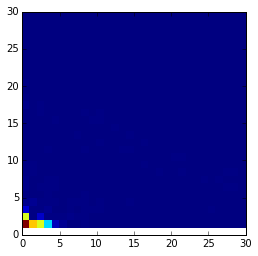

In [7]:
X,Y=np.meshgrid(ns,ks)
fig = plt.figure(figsize=(4,4))
ax=plt.axes()
_=ax.pcolormesh(X,Y,np.abs(zProject.T))

In [8]:
# Source localization with modes
zNew=np.zeros(radius.shape,complex)
for n, k in product(ns,ks):
    zMode = drumhead_mode(1,k,radius,theta,drumRadius)
    zNew += zProject[n, k-1]*zMode

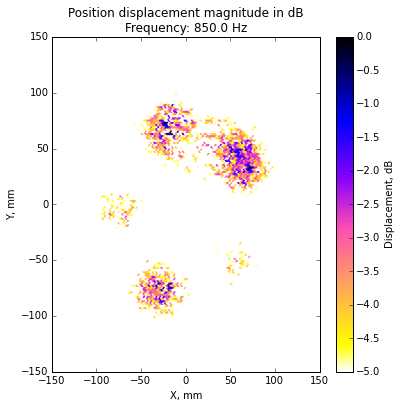

In [9]:
fig = plt.figure(figsize=(6,6))
c=20*np.log10(np.abs(experiment.response))
c-=np.max(c)
ax=plt.axes()
sp=ax.scatter(xPos, yPos, c=c, cmap=cm.gnuplot2_r,
              vmin=-5, vmax=0, lw = 0)
cb=plt.colorbar(sp)
cb.set_label('Displacement, dB')
_=ax.set_xlabel('X, mm')
_=ax.set_ylabel('Y, mm')
_=ax.set_title('Position displacement magnitude in dB'+\
              '\nFrequency: %0.1f Hz'%responseFreq)
_=plt.savefig('/Users/edwardlrichards/evansecentMF/figures/drumMagnitude')

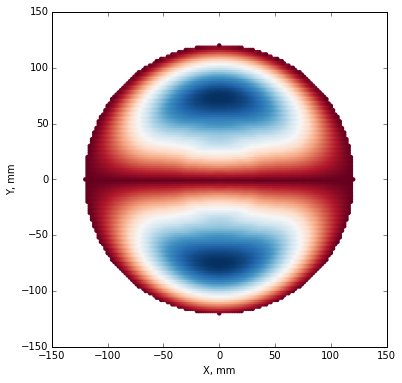

In [10]:
fig = plt.figure(figsize=(6,6))
ax=plt.axes()
_=ax.scatter(xPos, yPos, c=np.abs(zNew), cmap=cm.RdBu, lw = 0)
_=ax.set_xlabel('X, mm')
_=ax.set_ylabel('Y, mm')